In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
wine = load_wine()
X = wine.data
y= wine.target

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
components =[2,3,5]
accuracies=[]

In [10]:
for n in components:

    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    logreg = LogisticRegression(max_iter=600)
    logreg.fit(X_train_pca, y_train)
    y_pred=logreg.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Accuracy with {n} PCA components: {acc:.4f}")    

Accuracy with 2 PCA components: 0.7222
Accuracy with 3 PCA components: 0.9167
Accuracy with 5 PCA components: 0.9722


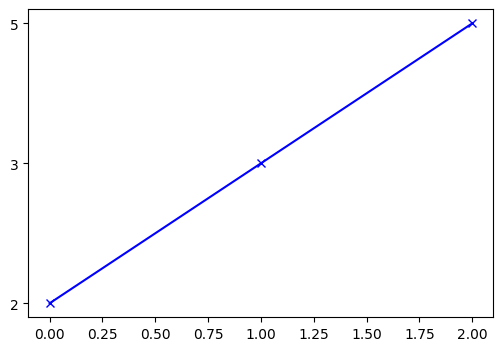

In [19]:
plt.figure(figsize=(6,4))
plt.plot([str(c) for c in components],color='blue',marker='x')


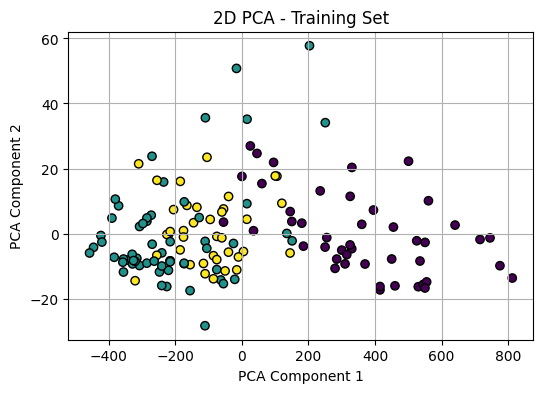

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1] , c=y_train , edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA - Training Set')
plt.grid(True)
plt.show()